In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [2]:
sms=pd.read_csv("spamSMS.csv", encoding="utf-8")
sms.head()

,Class,input Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
sms.shape


(5574, 2)

In [4]:
sms['Class'].value_counts()

ham     4827
spam     747
Name: Class, dtype: int64

In [5]:
print('Spam Ratio = ',np.round(len(sms[sms["Class"]=='spam'])/len(sms['Class']),2)*100)
print('Ham Ratio = ',np.round(len(sms[sms["Class"]=='ham'])/len(sms['Class']),2)*100)

Spam Ratio =  13.0
Ham Ratio =  87.0


In [6]:
#replacing Class name ham to 0 and Spam to 1
sms['Class'].replace({'ham':0,'spam':1}, inplace = True)

In [7]:
sms.head()

,Class,input Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
sms.groupby("Class").describe()

input Text                                                            \
           count unique                                                top   
Class                                                                        
0           4827   4518                             Sorry, I'll call later   
1            747    653  Please call our customer service representativ...   

            
      freq  
Class       
0       30  
1        4

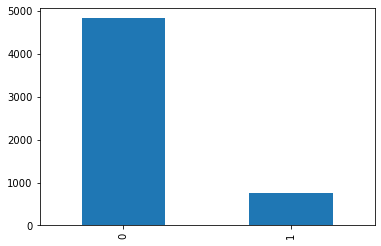

In [9]:
sms.Class.value_counts().plot.bar();

In [10]:
sms['length']=sms['input Text'].str.len();

In [11]:
sms.head();

### Data Preprocessing

In [12]:
#Getting rid of Stopwords
from nltk.corpus import stopwords
sw=set(stopwords.words('english')+['u','ū','ur','im','dont','doin','ure'])

In [13]:
sms['input Text']=sms['input Text'].apply(lambda x: ' '.join(term for term in x.split() if term not in sw))

In [14]:
#New Column lenght after removing stopwords
sms['new_length']=sms['input Text'].str.len();

In [15]:
#as we can see that the lenght has changed after removiung the stopwords
sms.head()

,Class,input Text,length,new_length
0,0,"Go jurong point, crazy.. Available bugis n gre...",111,91
1,0,Ok lar... Joking wif oni...,29,27
2,1,Free entry 2 wkly comp win FA Cup final tkts 2...,155,141
3,0,U dun say early hor... U c already say...,49,41
4,0,"Nah I think goes usf, lives around though",61,41


/Users/rohitky/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/rohitky/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


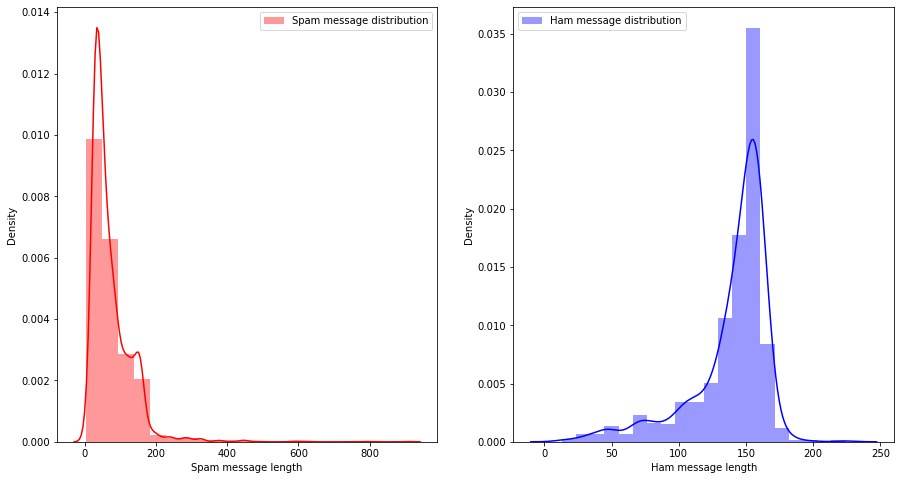

In [16]:
#Display Spam and Ham messages Distribution before removing the stopwords by plotiing the graph 
f,ax=plot.subplots(1,2,figsize=(15,8));

sns.distplot(sms[sms['Class']==0]['length'],bins=20,ax=ax[0],label='Spam message distribution',color='r');

ax[0].set_xlabel('Spam message length');
ax[0].legend();

sns.distplot(sms[sms['Class']==1]['length'],bins=20,ax=ax[1],label='Ham message distribution',color='b');

ax[1].set_xlabel('Ham message length');
ax[1].legend();

plot.show();

/Users/rohitky/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/rohitky/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


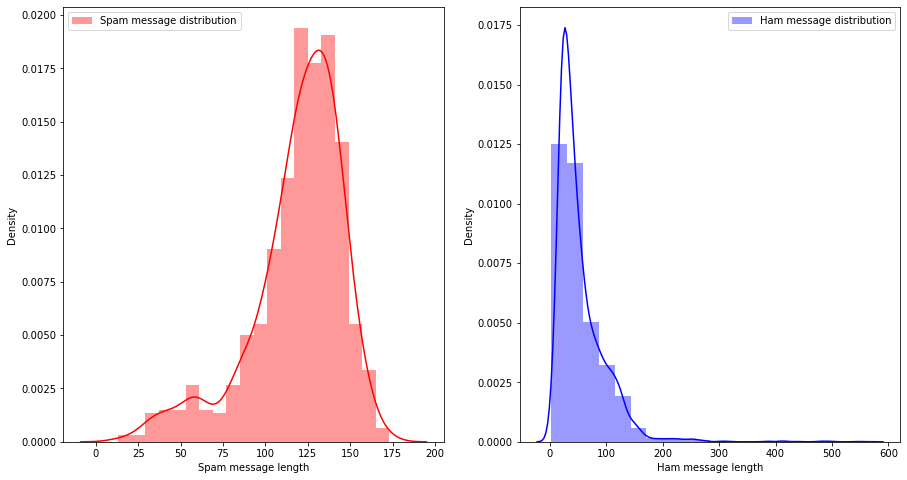

In [17]:
#Display Spam and Ham messages Distribution after removing the stopwords by plotiing the graph 
f,ax=plot.subplots(1,2,figsize=(15,8))

sns.distplot(sms[sms['Class']==1]['new_length'],bins=20,ax=ax[0],label='Spam message distribution',color='r')

ax[0].set_xlabel('Spam message length')
ax[0].legend()

sns.distplot(sms[sms['Class']==0]['new_length'],bins=20,ax=ax[1],label='Ham message distribution',color='b')

ax[1].set_xlabel('Ham message length')
ax[1].legend()

plot.show()

### Vectorization

In [18]:
#Need to convert the text into vectors
tf_vec=TfidfVectorizer()
features=tf_vec.fit_transform(sms['input Text'])


In [19]:
#Split feature and class
x=features
y=sms['Class']

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=7)

### Training Models

### 1.Naive Bayes

In [21]:
naiv=MultinomialNB()
naiv.fit(xtrain,ytrain)
pred=naiv.predict(xtest)

y_pred_prob = naiv.predict_proba(xtest)[:, 1]

Accuracy score 0.9719067543335326
-----------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1494
           1       0.79      1.00      0.88       179

    accuracy                           0.97      1673
   macro avg       0.90      0.98      0.93      1673
weighted avg       0.98      0.97      0.97      1673

ROC_AUC Score : 1.00


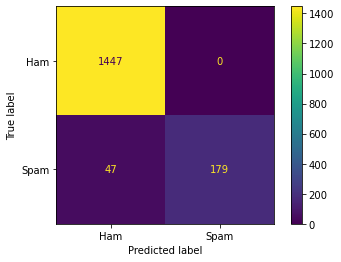

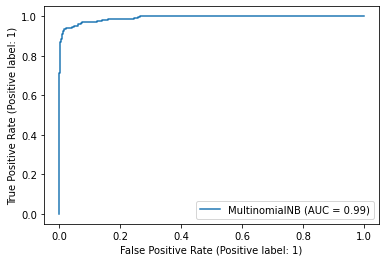

In [34]:
print('Accuracy score', accuracy_score(pred,ytest))
print('-----------------------------------------')
print('Classification Report')
print(classification_report(pred,ytest))
# calculate ROC_AUC score of class predictions
print("ROC_AUC Score : {:.2f}".format(roc_auc_score(ytest,y_pred_prob)))
# Create confusion matrix
dtcm = sklearn.metrics.confusion_matrix(ytest, pred)
dis = ConfusionMatrixDisplay(dtcm,display_labels=["Ham","Spam"])
dis.plot()
plot.show()
disp = plot_roc_curve(naiv, xtest, ytest)

### 2.Random Forest

In [35]:
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
pred=rf.predict(xtest)

y_pred_prob = rf.predict_proba(xtest)[:, 1]

Accuracy score 0.8989838613269575
-----------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.90      0.94      1616
           1       0.25      1.00      0.40        57

    accuracy                           0.90      1673
   macro avg       0.63      0.95      0.67      1673
weighted avg       0.97      0.90      0.93      1673

ROC_AUC Score : 0.95


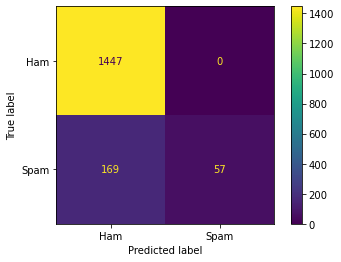

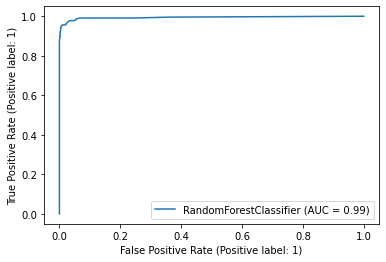

In [39]:
print('Accuracy score', accuracy_score(pred,ytest))
print('-----------------------------------------')
print('Classification Report')
print(classification_report(pred,ytest))

# calculate ROC_AUC score of class predictions
print("ROC_AUC Score : {:.2f}".format(roc_auc_score(ytest,y_pred_prob)))
# Create confusion matrix
dtcm = sklearn.metrics.confusion_matrix(ytest, pred)
dis = ConfusionMatrixDisplay(dtcm,display_labels=["Ham","Spam"])
dis.plot()
plot.show()
disp = plot_roc_curve(rf, xtest, ytest)

## 3.KNN

In [40]:
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)
pred=knn.predict(xtest)

y_pred_prob = knn.predict_proba(xtest)[:, 1]

Accuracy score 0.8989838613269575
-----------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.90      0.94      1616
           1       0.25      1.00      0.40        57

    accuracy                           0.90      1673
   macro avg       0.63      0.95      0.67      1673
weighted avg       0.97      0.90      0.93      1673

ROC_AUC Score : 0.95


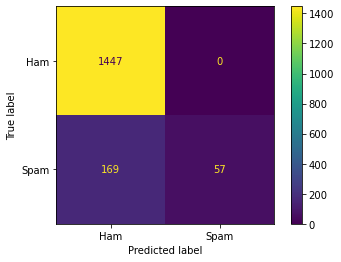

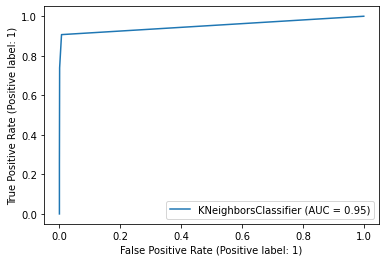

In [41]:
print('Accuracy score', accuracy_score(pred,ytest))
print('-----------------------------------------')
print('Classification Report')
print(classification_report(pred,ytest))

# calculate ROC_AUC score of class predictions
print("ROC_AUC Score : {:.2f}".format(roc_auc_score(ytest,y_pred_prob)))
# Create confusion matrix
dtcm = sklearn.metrics.confusion_matrix(ytest, pred)
dis = ConfusionMatrixDisplay(dtcm,display_labels=["Ham","Spam"])
dis.plot()
plot.show()
disp = plot_roc_curve(knn, xtest, ytest)

## 4.SVC

In [42]:
svc = SVC(probability=True)
svc.fit(xtrain,ytrain)
pred=svc.predict(xtest)

y_pred_prob = svc.predict_proba(xtest)[:, 1]

Accuracy score 0.9719067543335326
-----------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1494
           1       0.79      1.00      0.88       179

    accuracy                           0.97      1673
   macro avg       0.90      0.98      0.93      1673
weighted avg       0.98      0.97      0.97      1673

ROC_AUC Score : 1.00


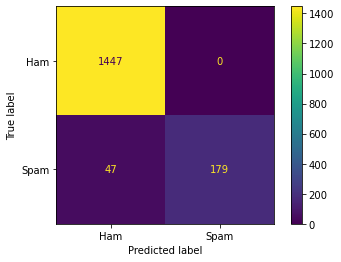

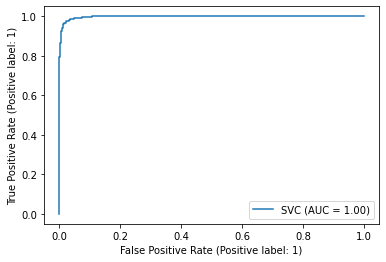

In [45]:
print('Accuracy score', accuracy_score(pred,ytest))
print('-----------------------------------------')
print('Classification Report')
print(classification_report(pred,ytest))

# calculate ROC_AUC score of class predictions
print("ROC_AUC Score : {:.2f}".format(roc_auc_score(ytest,y_pred_prob)))
# Create confusion matrix
dtcm = sklearn.metrics.confusion_matrix(ytest, pred)
dis = ConfusionMatrixDisplay(dtcm,display_labels=["Ham","Spam"])
dis.plot()
plot.show()
disp = plot_roc_curve(svc, xtest, ytest)

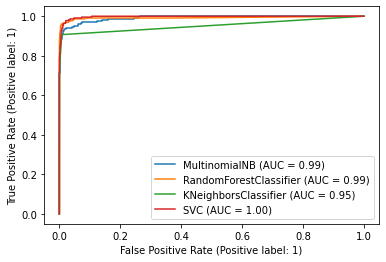

In [32]:

disp = plot_roc_curve(naiv, xtest, ytest)
plot_roc_curve(rf, xtest, ytest, ax=disp.ax_);
plot_roc_curve(knn, xtest, ytest, ax=disp.ax_)
plot_roc_curve(svc, xtest, ytest, ax=disp.ax_)
